In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
match_results = pd.read_csv("match_results.csv")
match_results.head()

,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,2008/2009,10260,10261,1,1
1,2008/2009,9825,8659,1,0
2,2008/2009,8472,8650,0,1
3,2008/2009,8654,8528,2,1
4,2008/2009,10252,8456,4,2


In [3]:
winning_team = np.repeat('NaN',len(match_results.index))
match_results['winning_team'] = winning_team
match_results.head()

,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winning_team
0,2008/2009,10260,10261,1,1,NaN
1,2008/2009,9825,8659,1,0,NaN
2,2008/2009,8472,8650,0,1,NaN
3,2008/2009,8654,8528,2,1,NaN
4,2008/2009,10252,8456,4,2,NaN


### Creating placeholders for wins and losses to see which teams improved the most over the course of the time period

In [4]:
team = pd.read_csv("Team.csv")
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [5]:
team_array = dict(zip(team['team_api_id'],team['team_long_name']))
print(team_array)

{9987: 'KRC Genk', 9993: 'Beerschot AC', 10000: 'SV Zulte-Waregem', 9994: 'Sporting Lokeren', 9984: 'KSV Cercle Brugge', 8635: 'RSC Anderlecht', 9991: 'KAA Gent', 9998: 'RAEC Mons', 7947: 'FCV Dender EH', 9985: 'Standard de Liège', 8203: 'KV Mechelen', 8342: 'Club Brugge KV', 9999: 'KSV Roeselare', 8571: 'KV Kortrijk', 4049: 'Tubize', 9996: 'Royal Excel Mouscron', 10001: 'KVC Westerlo', 9986: 'Sporting Charleroi', 9997: 'Sint-Truidense VV', 9989: 'Lierse SK', 6351: 'KAS Eupen', 1773: 'Oud-Heverlee Leuven', 8475: 'Waasland-Beveren', 8573: 'KV Oostende', 274581: 'Royal Excel Mouscron', 10260: 'Manchester United', 10261: 'Newcastle United', 9825: 'Arsenal', 8659: 'West Bromwich Albion', 8472: 'Sunderland', 8650: 'Liverpool', 8654: 'West Ham United', 8528: 'Wigan Athletic', 10252: 'Aston Villa', 8456: 'Manchester City', 8668: 'Everton', 8655: 'Blackburn Rovers', 8549: 'Middlesbrough', 8586: 'Tottenham Hotspur', 8559: 'Bolton Wanderers', 10194: 'Stoke City', 8667: 'Hull City', 9879: 'Fulham

In [6]:
match_results['home_team_api_id'].replace(team_array,inplace=True)
match_results['away_team_api_id'].replace(team_array,inplace=True)
match_results.head()

,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winning_team
0,2008/2009,Manchester United,Newcastle United,1,1,NaN
1,2008/2009,Arsenal,West Bromwich Albion,1,0,NaN
2,2008/2009,Sunderland,Liverpool,0,1,NaN
3,2008/2009,West Ham United,Wigan Athletic,2,1,NaN
4,2008/2009,Aston Villa,Manchester City,4,2,NaN


In [7]:
match_results.rename(columns = {'home_team_api_id':'home_team_name', 'away_team_api_id':'away_team_name'}, inplace=True)
match_results.head()

,season,home_team_name,away_team_name,home_team_goal,away_team_goal,winning_team
0,2008/2009,Manchester United,Newcastle United,1,1,NaN
1,2008/2009,Arsenal,West Bromwich Albion,1,0,NaN
2,2008/2009,Sunderland,Liverpool,0,1,NaN
3,2008/2009,West Ham United,Wigan Athletic,2,1,NaN
4,2008/2009,Aston Villa,Manchester City,4,2,NaN


In [8]:
for index in range(len(match_results['winning_team']) - 1):
    if match_results['home_team_goal'].iloc[index] > match_results['away_team_goal'].iloc[index]:
        match_results.at[index,'winning_team'] = match_results['home_team_name'].iloc[index]
    elif match_results['home_team_goal'].iloc[index] < match_results['away_team_goal'].iloc[index]:
         match_results.at[index,'winning_team'] = match_results['away_team_name'].iloc[index]
    else:
        match_results.at[index,'winning_team'] = 'draw'
match_results.head()

,season,home_team_name,away_team_name,home_team_goal,away_team_goal,winning_team
0,2008/2009,Manchester United,Newcastle United,1,1,draw
1,2008/2009,Arsenal,West Bromwich Albion,1,0,Arsenal
2,2008/2009,Sunderland,Liverpool,0,1,Liverpool
3,2008/2009,West Ham United,Wigan Athletic,2,1,West Ham United
4,2008/2009,Aston Villa,Manchester City,4,2,Aston Villa


In [9]:
season_results = match_results.drop(columns={'home_team_goal','away_team_goal'})
season_results.head()

,season,home_team_name,away_team_name,winning_team
0,2008/2009,Manchester United,Newcastle United,draw
1,2008/2009,Arsenal,West Bromwich Albion,Arsenal
2,2008/2009,Sunderland,Liverpool,Liverpool
3,2008/2009,West Ham United,Wigan Athletic,West Ham United
4,2008/2009,Aston Villa,Manchester City,Aston Villa


In [10]:
season_results['season'].value_counts()

2013/2014    380
2010/2011    380
2008/2009    380
2012/2013    380
2014/2015    380
2011/2012    380
2015/2016    380
2009/2010    380
Name: season, dtype: int64

In [11]:
df_0809_temp = season_results.query('season == "2008/2009"')
df_0809_temp.head()

,season,home_team_name,away_team_name,winning_team
0,2008/2009,Manchester United,Newcastle United,draw
1,2008/2009,Arsenal,West Bromwich Albion,Arsenal
2,2008/2009,Sunderland,Liverpool,Liverpool
3,2008/2009,West Ham United,Wigan Athletic,West Ham United
4,2008/2009,Aston Villa,Manchester City,Aston Villa


In [12]:
league_data = df_0809_temp['home_team_name'].value_counts() + df_0809_temp['away_team_name'].value_counts()
league_data = pd.DataFrame(league_data)
league_data.columns = ['games_played']
league_data.head()

,games_played
Arsenal,38
Aston Villa,38
Blackburn Rovers,38
Bolton Wanderers,38
Chelsea,38


In [13]:
df_0809_temp = df_0809_temp.query('winning_team != "draw"')
df_0809_temp.head()

,season,home_team_name,away_team_name,winning_team
1,2008/2009,Arsenal,West Bromwich Albion,Arsenal
2,2008/2009,Sunderland,Liverpool,Liverpool
3,2008/2009,West Ham United,Wigan Athletic,West Ham United
4,2008/2009,Aston Villa,Manchester City,Aston Villa
5,2008/2009,Everton,Blackburn Rovers,Blackburn Rovers


In [14]:
league_data['games_won'] = df_0809_temp['winning_team'].value_counts()
league_data.head()

,games_played,games_won
Arsenal,38,20
Aston Villa,38,17
Blackburn Rovers,38,10
Bolton Wanderers,38,11
Chelsea,38,25


In [15]:
league_data['win_%_0809'] = league_data['games_won'] / league_data['games_played']
league_data.head()

,games_played,games_won,win_%_0809
Arsenal,38,20,0.526316
Aston Villa,38,17,0.447368
Blackburn Rovers,38,10,0.263158
Bolton Wanderers,38,11,0.289474
Chelsea,38,25,0.657895


In [16]:
league_data.drop(columns={'games_played','games_won'}, inplace=True)
league_data.head()

,win_%_0809
Arsenal,0.526316
Aston Villa,0.447368
Blackburn Rovers,0.263158
Bolton Wanderers,0.289474
Chelsea,0.657895


In [17]:
def reset_dataFrame(temp):
    temp = pd.DataFrame(None)
    return temp

In [18]:
df_0910_temp = season_results.query('season == "2009/2010"')
temp = df_0910_temp['home_team_name'].value_counts() + df_0910_temp['away_team_name'].value_counts()
temp = pd.DataFrame(temp)
temp.columns = ['games_played']
df_0910_temp = df_0910_temp.query('winning_team != "draw"')
temp['games_won'] = df_0910_temp['winning_team'].value_counts()
temp['win_%_0910'] = temp['games_won'] / temp['games_played']
temp.head()

,games_played,games_won,win_%_0910
Arsenal,38,23,0.605263
Aston Villa,38,17,0.447368
Birmingham City,38,13,0.342105
Blackburn Rovers,38,13,0.342105
Bolton Wanderers,38,10,0.263158


In [19]:
league_data['win_%_0910'] = temp['win_%_0910']

In [20]:
reset_dataFrame(temp)
df_1011_temp = season_results.query('season == "2010/2011"')
temp = df_1011_temp['home_team_name'].value_counts() + df_1011_temp['away_team_name'].value_counts()
temp = pd.DataFrame(temp)
temp.columns = ['games_played']
df_1011_temp = df_1011_temp.query('winning_team != "draw"')
temp['games_won'] = df_1011_temp['winning_team'].value_counts()
temp['win_%_1011'] = temp['games_won'] / temp['games_played']
temp.head()

,games_played,games_won,win_%_1011
Arsenal,38,19,0.500000
Aston Villa,38,12,0.315789
Birmingham City,38,8,0.210526
Blackburn Rovers,38,11,0.289474
Blackpool,38,10,0.263158


In [21]:
league_data['win_%_1011'] = temp['win_%_1011']
league_data.head()

,win_%_0809,win_%_0910,win_%_1011
Arsenal,0.526316,0.605263,0.500000
Aston Villa,0.447368,0.447368,0.315789
Blackburn Rovers,0.263158,0.342105,0.289474
Bolton Wanderers,0.289474,0.263158,0.315789
Chelsea,0.657895,0.710526,0.552632


In [22]:
reset_dataFrame(temp)
df_1112_temp = season_results.query('season == "2011/2012"')
temp = df_1112_temp['home_team_name'].value_counts() + df_1112_temp['away_team_name'].value_counts()
temp = pd.DataFrame(temp)
temp.columns = ['games_played']
df_1112_temp = df_1112_temp.query('winning_team != "draw"')
temp['games_won'] = df_1112_temp['winning_team'].value_counts()
temp['win_%_1112'] = temp['games_won'] / temp['games_played']
temp.head()

,games_played,games_won,win_%_1112
Arsenal,38,21,0.552632
Aston Villa,38,7,0.184211
Blackburn Rovers,38,8,0.210526
Bolton Wanderers,38,10,0.263158
Chelsea,38,18,0.473684


In [23]:
league_data['win_%_1112'] = temp['win_%_1112']
league_data.head()

,win_%_0809,win_%_0910,win_%_1011,win_%_1112
Arsenal,0.526316,0.605263,0.500000,0.552632
Aston Villa,0.447368,0.447368,0.315789,0.184211
Blackburn Rovers,0.263158,0.342105,0.289474,0.210526
Bolton Wanderers,0.289474,0.263158,0.315789,0.263158
Chelsea,0.657895,0.710526,0.552632,0.473684


In [24]:
reset_dataFrame(temp)
df_1213_temp = season_results.query('season == "2012/2013"')
temp = df_1213_temp['home_team_name'].value_counts() + df_1213_temp['away_team_name'].value_counts()
temp = pd.DataFrame(temp)
temp.columns = ['games_played']
df_1213_temp = df_1213_temp.query('winning_team != "draw"')
temp['games_won'] = df_1213_temp['winning_team'].value_counts()
temp['win_%_1213'] = temp['games_won'] / temp['games_played']
temp.head()

,games_played,games_won,win_%_1213
Arsenal,38,21,0.552632
Aston Villa,38,10,0.263158
Chelsea,38,22,0.578947
Everton,38,16,0.421053
Fulham,38,11,0.289474


In [25]:
league_data['win_%_1213'] = temp['win_%_1213']
league_data.head()

,win_%_0809,win_%_0910,win_%_1011,win_%_1112,win_%_1213
Arsenal,0.526316,0.605263,0.500000,0.552632,0.552632
Aston Villa,0.447368,0.447368,0.315789,0.184211,0.263158
Blackburn Rovers,0.263158,0.342105,0.289474,0.210526,NaN
Bolton Wanderers,0.289474,0.263158,0.315789,0.263158,NaN
Chelsea,0.657895,0.710526,0.552632,0.473684,0.578947


In [26]:
reset_dataFrame(temp)
df_1314_temp = season_results.query('season == "2013/2014"')
temp = df_1314_temp['home_team_name'].value_counts() + df_1314_temp['away_team_name'].value_counts()
temp = pd.DataFrame(temp)
temp.columns = ['games_played']
df_1314_temp = df_1314_temp.query('winning_team != "draw"')
temp['games_won'] = df_1314_temp['winning_team'].value_counts()
temp['win_%_1314'] = temp['games_won'] / temp['games_played']
temp.head()

,games_played,games_won,win_%_1314
Arsenal,38,24,0.631579
Aston Villa,38,10,0.263158
Cardiff City,38,7,0.184211
Chelsea,38,25,0.657895
Crystal Palace,38,13,0.342105


In [27]:
league_data['win_%_1314'] = temp['win_%_1314']
league_data.head()

,win_%_0809,win_%_0910,win_%_1011,win_%_1112,win_%_1213,win_%_1314
Arsenal,0.526316,0.605263,0.500000,0.552632,0.552632,0.631579
Aston Villa,0.447368,0.447368,0.315789,0.184211,0.263158,0.263158
Blackburn Rovers,0.263158,0.342105,0.289474,0.210526,NaN,NaN
Bolton Wanderers,0.289474,0.263158,0.315789,0.263158,NaN,NaN
Chelsea,0.657895,0.710526,0.552632,0.473684,0.578947,0.657895


In [28]:
reset_dataFrame(temp)
df_1415_temp = season_results.query('season == "2014/2015"')
temp = df_1415_temp['home_team_name'].value_counts() + df_1415_temp['away_team_name'].value_counts()
temp = pd.DataFrame(temp)
temp.columns = ['games_played']
df_1415_temp = df_1415_temp.query('winning_team != "draw"')
temp['games_won'] = df_1415_temp['winning_team'].value_counts()
temp['win_%_1415'] = temp['games_won'] / temp['games_played']
temp.head()

,games_played,games_won,win_%_1415
Arsenal,38,22,0.578947
Aston Villa,38,10,0.263158
Burnley,38,7,0.184211
Chelsea,38,26,0.684211
Crystal Palace,38,13,0.342105


In [29]:
league_data['win_%_1415'] = temp['win_%_1415']
league_data.head()

,win_%_0809,win_%_0910,win_%_1011,win_%_1112,win_%_1213,win_%_1314,win_%_1415
Arsenal,0.526316,0.605263,0.500000,0.552632,0.552632,0.631579,0.578947
Aston Villa,0.447368,0.447368,0.315789,0.184211,0.263158,0.263158,0.263158
Blackburn Rovers,0.263158,0.342105,0.289474,0.210526,NaN,NaN,NaN
Bolton Wanderers,0.289474,0.263158,0.315789,0.263158,NaN,NaN,NaN
Chelsea,0.657895,0.710526,0.552632,0.473684,0.578947,0.657895,0.684211


In [30]:
league_data.head()

,win_%_0809,win_%_0910,win_%_1011,win_%_1112,win_%_1213,win_%_1314,win_%_1415
Arsenal,0.526316,0.605263,0.500000,0.552632,0.552632,0.631579,0.578947
Aston Villa,0.447368,0.447368,0.315789,0.184211,0.263158,0.263158,0.263158
Blackburn Rovers,0.263158,0.342105,0.289474,0.210526,NaN,NaN,NaN
Bolton Wanderers,0.289474,0.263158,0.315789,0.263158,NaN,NaN,NaN
Chelsea,0.657895,0.710526,0.552632,0.473684,0.578947,0.657895,0.684211


In [31]:
league_data.dropna(inplace=True)
league_data.head(100)

,win_%_0809,win_%_0910,win_%_1011,win_%_1112,win_%_1213,win_%_1314,win_%_1415
Arsenal,0.526316,0.605263,0.500000,0.552632,0.552632,0.631579,0.578947
Aston Villa,0.447368,0.447368,0.315789,0.184211,0.263158,0.263158,0.263158
Chelsea,0.657895,0.710526,0.552632,0.473684,0.578947,0.657895,0.684211
Everton,0.447368,0.421053,0.342105,0.394737,0.421053,0.552632,0.315789
Liverpool,0.657895,0.473684,0.447368,0.368421,0.421053,0.684211,0.473684
Manchester City,0.394737,0.473684,0.552632,0.736842,0.605263,0.710526,0.631579
Manchester United,0.736842,0.710526,0.605263,0.736842,0.736842,0.500000,0.526316
Stoke City,0.315789,0.289474,0.342105,0.289474,0.236842,0.342105,0.394737
Sunderland,0.236842,0.289474,0.315789,0.289474,0.236842,0.263158,0.184211
Tottenham Hotspur,0.368421,0.552632,0.421053,0.526316,0.552632,0.552632,0.500000


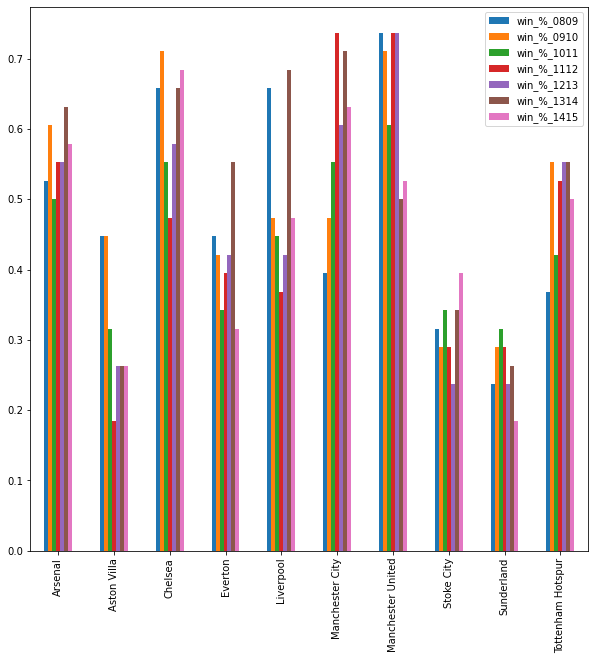

In [32]:
league_data.plot.bar(figsize=(10,10));

In [33]:
league_data['win_%_+/-_since_0809'] = league_data.sum(axis=1) - (8*league_data['win_%_0809'])
league_data.head(100)

,win_%_0809,win_%_0910,win_%_1011,win_%_1112,win_%_1213,win_%_1314,win_%_1415,win_%_+/-_since_0809
Arsenal,0.526316,0.605263,0.500000,0.552632,0.552632,0.631579,0.578947,-0.263158
Aston Villa,0.447368,0.447368,0.315789,0.184211,0.263158,0.263158,0.263158,-1.394737
Chelsea,0.657895,0.710526,0.552632,0.473684,0.578947,0.657895,0.684211,-0.947368
Everton,0.447368,0.421053,0.342105,0.394737,0.421053,0.552632,0.315789,-0.684211
Liverpool,0.657895,0.473684,0.447368,0.368421,0.421053,0.684211,0.473684,-1.736842
Manchester City,0.394737,0.473684,0.552632,0.736842,0.605263,0.710526,0.631579,0.947368
Manchester United,0.736842,0.710526,0.605263,0.736842,0.736842,0.500000,0.526316,-1.342105
Stoke City,0.315789,0.289474,0.342105,0.289474,0.236842,0.342105,0.394737,-0.315789
Sunderland,0.236842,0.289474,0.315789,0.289474,0.236842,0.263158,0.184211,-0.078947
Tottenham Hotspur,0.368421,0.552632,0.421053,0.526316,0.552632,0.552632,0.500000,0.526316


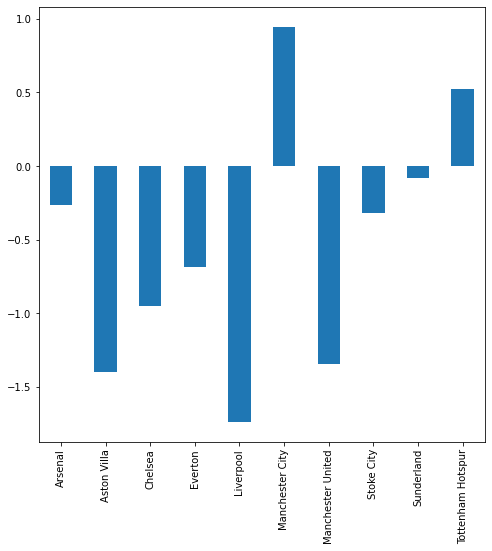

In [34]:
league_data['win_%_+/-_since_0809'].plot.bar(figsize=(8,8));

In [35]:
match_results.head()

,season,home_team_name,away_team_name,home_team_goal,away_team_goal,winning_team
0,2008/2009,Manchester United,Newcastle United,1,1,draw
1,2008/2009,Arsenal,West Bromwich Albion,1,0,Arsenal
2,2008/2009,Sunderland,Liverpool,0,1,Liverpool
3,2008/2009,West Ham United,Wigan Athletic,2,1,West Ham United
4,2008/2009,Aston Villa,Manchester City,4,2,Aston Villa


In [36]:
goals_home_data = match_results.groupby(["home_team_name"]).home_team_goal.sum()
goals_home_data = pd.DataFrame(goals_home_data)
goals_home_data.head()

,home_team_goal
home_team_name,
Arsenal,306
Aston Villa,179
Birmingham City,38
Blackburn Rovers,98
Blackpool,30


In [37]:
goals_away_data = match_results.groupby(["away_team_name"]).away_team_goal.sum()
goals_away_data = pd.DataFrame(goals_away_data)
goals_away_data.index.rename('home_team_name', inplace=True)
goals_away_data.head()

,away_team_goal
home_team_name,
Arsenal,267
Aston Villa,156
Birmingham City,37
Blackburn Rovers,77
Blackpool,25


In [38]:
goals_home_data = goals_home_data.join(goals_away_data)
goals_home_data.head()

,home_team_goal,away_team_goal
home_team_name,,
Arsenal,306,267
Aston Villa,179,156
Birmingham City,38,37
Blackburn Rovers,98,77
Blackpool,30,25


In [39]:
goals_home_data['total_goals'] = goals_home_data['home_team_goal'] + goals_home_data['away_team_goal']
goals_home_data.drop(columns={'home_team_goal', 'away_team_goal'}, inplace=True)
goals_home_data.head()

,total_goals
home_team_name,
Arsenal,573
Aston Villa,335
Birmingham City,75
Blackburn Rovers,175
Blackpool,55


In [40]:
total_games = match_results['home_team_name'].value_counts() + match_results['away_team_name'].value_counts()
total_games = pd.DataFrame(total_games)
total_games.columns = ['games_played']
total_games.index.rename('home_team_name', inplace=True)
total_games.head()

,games_played
home_team_name,
Aston Villa,304
Stoke City,304
Everton,304
Manchester City,304
Tottenham Hotspur,304


In [41]:
total_games['games_won'] = match_results['winning_team'].value_counts()
total_games.head(100)

,games_played,games_won
home_team_name,,
Aston Villa,304,86
Stoke City,304,98
Everton,304,121
Manchester City,304,175
Tottenham Hotspur,304,151
Liverpool,304,150
Chelsea,304,176
Manchester United,304,192
Sunderland,304,78


In [42]:
goals_home_data = goals_home_data.join(total_games)
goals_home_data.head()

,total_goals,games_played,games_won
home_team_name,,,
Arsenal,573,304,170
Aston Villa,335,304,86
Birmingham City,75,76,21
Blackburn Rovers,175,152,42
Blackpool,55,38,10


In [43]:
scoring_to_win_data = goals_home_data
scoring_to_win_data.index.rename('team_name', inplace=True)
scoring_to_win_data['goals_per_game'] = scoring_to_win_data['total_goals'] / scoring_to_win_data['games_played']
scoring_to_win_data['win_percentage'] = scoring_to_win_data['games_won'] / scoring_to_win_data['games_played']
scoring_to_win_data.head()

,total_goals,games_played,games_won,goals_per_game,win_percentage
team_name,,,,,
Arsenal,573,304,170,1.884868,0.559211
Aston Villa,335,304,86,1.101974,0.282895
Birmingham City,75,76,21,0.986842,0.276316
Blackburn Rovers,175,152,42,1.151316,0.276316
Blackpool,55,38,10,1.447368,0.263158


In [44]:
scoring_to_win_data.drop(columns={'total_goals', 'games_played', 'games_won'}, inplace=True)
scoring_to_win_data.head()

,goals_per_game,win_percentage
team_name,,
Arsenal,1.884868,0.559211
Aston Villa,1.101974,0.282895
Birmingham City,0.986842,0.276316
Blackburn Rovers,1.151316,0.276316
Blackpool,1.447368,0.263158


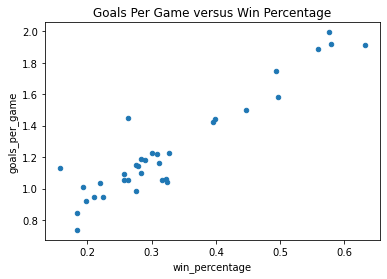

In [45]:
scoring_to_win_data.plot.scatter(x='win_percentage',y='goals_per_game')
plt.title("Goals Per Game versus Win Percentage");